## **Module G1: Numerical Integration**

#### **21.1 to 21.3 notes:** 

##### Given a function 𝑓(𝑥), to approximate the integral of 𝑓(𝑥) over the total interval, [𝑎,𝑏] is to approximate the area it covers in this invertal. Assume that the interval has been discretized into a numeral grid, 𝑥, consisting of 𝑛+1 points with spacing, $h=\dfrac{b-a}{n}$. Here, we denote each point in 𝑥 by $x_\mathrm{i}$, where $x_\mathrm{0}$ and $x_\mathrm{n} =b$. Note: There are 𝑛+1 grid points because the count starts at 𝑥0. We also assume we have a function, 𝑓(𝑥), that can be computed for any of the grid points, or that we have been given the function implicitly as 𝑓($x_\mathrm{i}$). The interval [$x_\mathrm{i}$,$x_\mathrm{i+1}$] is referred to as a subinterval.

#### **Riemanns Integral:** The simplest method for approximating integrals is by summing the area of rectangles that are defined for each subinterval. The width of the rectangle is $x_\mathrm{i+1}- x_\mathrm{i}=h$, and the height is defined by a function value 𝑓(𝑥) for some 𝑥 in the subinterval. An obvious choice for the height is the function value at the left endpoint, $x_\mathrm{i}$, or the right endpoint, $x_\mathrm{i+1}$, This method gives the Riemann Integral approximation, which is:

$$
\int _a^{b} f(x)dx \approx\sum _ {i=0}^{n-1}hf(x_\mathrm{i}),
$$
or
$$
\int _a^{b} f(x)dx \approx\sum _ {i=1}^{n}hf(x_\mathrm{i}),
$$
the **mid-point rule**
$$
\int _a^{b} f(x)dx \approx\sum _ {i=1}^{n-1}hf(y_\mathrm{i}), y_\mathrm{i}=\frac{x_\mathrm{i+1}+x_\mathrm{i}}{2}
$$

example: Use the left Riemann Integral, right Riemann Integral, and Midpoint Rule to approximate $\int _0^{𝜋}sin(𝑥)𝑑𝑥$ wtih 11 evenly spaced grid ponts over the whole interval. Compare this value to the exact value of 2

In [1]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print(I_riemannL)
print(err_riemannL)

print(I_riemannR)
print(err_riemannR)

print(I_mid)
print(err_mid)

1.9835235375094546
0.01647646249054535
1.9835235375094546
0.01647646249054535
2.0082484079079745
-0.008248407907974542


**conclusion**: left and right Riemann Integral does not make too much difference, but the mid-point Riemann Integral improved the accuracy a lot.

**Trapezoid Rule:** The Trapezoid Rule fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. This approximation for the integral to an arbitrary function is shown in the following figure. For each subinterval, the Trapezoid Rule computes the area of a trapezoid with corners at ($x_\mathrm{i}$,0),($x_\mathrm{i+1}$,0),($x_\mathrm{i}$,𝑓($x_\mathrm{i}$)), and ($x_\mathrm{i+1}$,𝑓($x_\mathrm{i+1}$)), which is $h\frac{f(x_\mathrm{i})+f(x_\mathrm{i+1})}{2}$.Thus, the Trapezoid Rule approximates integrals according to the expression

$$
\int _a^{b} f(x)dx \approx\sum _ {i=1}^{n-1}h\frac{f(x_\mathrm{i})+f(x_\mathrm{i+1})}{2},
$$

**example:**Use the Trapezoid Rule to approximate $\int _0^{𝜋}sin(𝑥)𝑑𝑥$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.

In [2]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.9835235375094546
0.01647646249054535


**question**: based on the taylor expansion, Tapezoid Rule should have the same accuracy as the mid-point Riemanns Integral, how come the result came out only the same accuracy as the left or right point Riemanns integral??

### **Exercise**

**Exercise(1)** Write a function 𝑚𝑦_𝑛𝑢𝑚_𝑐𝑎𝑙𝑐(𝑓,𝑎,𝑏,𝑛, option) using Riemanns Integral method. The output 𝐼 is the numerical integral of 𝑓, a function object, computed on a grid of 𝑛 evenly spaced points starting at 𝑎 and ending at 𝑏,  The integration method used should be one of the following strings defined by option: ‘left’, ‘right’, ‘midpoint’, indicating that the the function value should be taken from the let, right endpoint or the mid point of the interval, respectively


In [3]:
def my_num_calc(f, a, b, n, option):
    h = (b-a)/(n-1)
    x0 = a
    I=0
    if option == 'right':
      for i in range(1,n):
        x = a+h*i
        I += h*f(x)

    elif option == 'left':
      for i in range(0,n-1):
        x = a+h*i
        I += h*f(x)
    
    elif option == 'midpoint':
      for i in range(0, n-1):
        y = a+h/2+h*i
        I += h*f(y)
 
    return I


In [4]:
f = lambda x: x**2
my_num_calc(f, 0, 1, 101, 'right')


0.33835000000000015

In [5]:
f = lambda x: x**2
my_num_calc(f, 0, 1, 101, 'left')

0.32835000000000014

In [6]:
f = lambda x: x**2
my_num_calc(f, 0, 1, 101, 'midpoint')

0.33332500000000004

In [7]:
import numpy as np
f = lambda x: np.sin(x)
my_num_calc(f, 0, np.pi, 11, 'right')

1.9835235375094544

In [8]:
import numpy as np
f = lambda x: np.sin(x)
my_num_calc(f, 0, np.pi, 11, 'left')

1.9835235375094544

In [9]:
import numpy as np
f = lambda x: np.sin(x)
my_num_calc(f, 0, np.pi, 11, 'midpoint')

2.0082484079079745

**Exercxise(2):** Write a function my_trapz_int(𝑓,𝑎,𝑏,𝑛) using Trapezoid Rule. The output 𝐼 is the numerical integral of 𝑓, a function object, computed on a grid of 𝑛 evenly spaced points starting at 𝑎 and ending at 𝑏.

In [10]:
def my_trapz_int(f, a, b, n):
    h = (b-a)/(n-1)
    x0 = a
    I=0
    for i in range(0,n-1):
      x = a+h*i
      I += h*(f(x)+f(x+h))/2
 
    return I


In [11]:
f = lambda x: x**2
my_trapz_int(f, 0, 1, 3)

0.375

In [12]:
f = lambda x: x**2
my_trapz_int(f, 0, 1, 101)

0.33335

In [13]:
import numpy as np
f = lambda x: np.sin(x)
my_trapz_int(f, 0, np.pi, 11)

1.9835235375094546

**Exercise(3):** Using Trapezoid Rule to plot $
f(x) = \frac{1}{1+x^2}$ on [0,5] with N=5, 10, 100 evenly distributed spaces, respectively


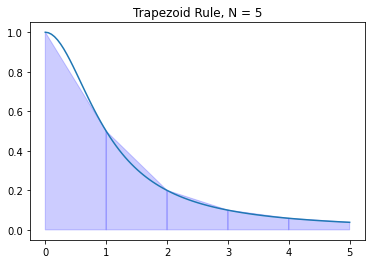

In [14]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 5

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

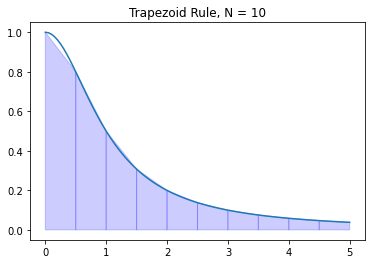

In [15]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

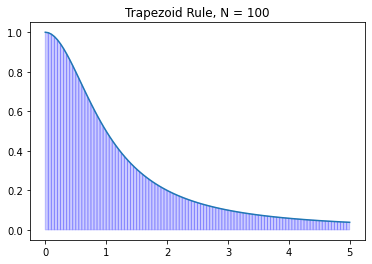

In [16]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 100

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()